In [8]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))

['Checkouts_By_Title_Data_Lens_2013.csv', 'Checkouts_By_Title_Data_Lens_2010.csv', 'Checkouts_By_Title_Data_Lens_2016.csv', 'Checkouts_By_Title_Data_Lens_2006.csv', 'Checkouts_By_Title_Data_Lens_2017.csv', 'Checkouts_By_Title_Data_Lens_2005.csv', 'Checkouts_By_Title_Data_Lens_2015.csv', 'Checkouts_By_Title_Data_Lens_2011.csv', 'Checkouts_By_Title_Data_Lens_2012.csv', 'Checkouts_By_Title_Data_Lens_2007.csv', 'Integrated_Library_System__ILS__Data_Dictionary.csv', 'Library_Collection_Inventory.csv', 'Checkouts_By_Title_Data_Lens_2009.csv', 'Checkouts_By_Title_Data_Lens_2008.csv', 'Checkouts_By_Title_Data_Lens_2014.csv']


* Let's look at items which have more than 1 copy. 
* Based on this eDA, it seems likely that the data records we have here are wrong , it doesn't make sense for there to be just 1 copy of the super-vast majority of items. (Majority yes, but not ~99%)

In [9]:
df = pd.read_csv("../input/Library_Collection_Inventory.csv") #,nrows=5
print(df.shape)
df.head()

(2687149, 13)


,BibNum,Title,Author,ISBN,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,FloatingItem,ItemLocation,ReportDate,ItemCount
0,3011076,A tale of two friends / adapted by Ellie O'Rya...,"O'Ryan, Ellie","1481425730, 1481425749, 9781481425735, 9781481...",2014.,"Simon Spotlight,","Musicians Fiction, Bullfighters Fiction, Best ...",jcbk,ncrdr,Floating,qna,09/01/2017,1
1,2248846,"Naruto. Vol. 1, Uzumaki Naruto / story and art...","Kishimoto, Masashi, 1974-",1569319006,"2003, c1999.","Viz,","Ninja Japan Comic books strips etc, Comic book...",acbk,nycomic,NaN,lcy,09/01/2017,1
2,3209270,"Peace, love & Wi-Fi : a ZITS treasury / by Jer...","Scott, Jerry, 1955-","144945867X, 9781449458676",2014.,"Andrews McMeel Publishing,",Duncan Jeremy Fictitious character Comic books...,acbk,nycomic,NaN,bea,09/01/2017,1
3,1907265,The Paris pilgrims : a novel / Clancy Carlile.,"Carlile, Clancy, 1930-",0786706155,c1999.,"Carroll & Graf,","Hemingway Ernest 1899 1961 Fiction, Biographic...",acbk,cafic,NaN,cen,09/01/2017,1
4,1644616,"Erotic by nature : a celebration of life, of l...",NaN,094020813X,"1991, c1988.","Red Alder Books/Down There Press,","Erotic literature American, American literatur...",acbk,canf,NaN,cen,09/01/2017,1


In [10]:
df2 = df.loc[df.ItemCount>1]
print(df2.shape[0])
df2.tail()

316293


,BibNum,Title,Author,ISBN,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,FloatingItem,ItemLocation,ReportDate,ItemCount
2687129,2980574,Tales from High Hallack : the collected short ...,"Norton, Andre","1624671896, 9781624671890",[2014],"Premier Digital Publishing,","Witch World Imaginary place Fiction, Fantasy f...",acbk,casf,NaN,cen,10/01/2017,2
2687135,2330439,Love-lies-bleeding : a play / Don DeLillo.,"DeLillo, Don","0743273052, 0743273060",c2005.,"Scribner,","Terminally ill Family relationships Drama, Ter...",acbk,canf,NaN,cen,10/01/2017,2
2687137,3194995,Unforgiven / Mary Balogh.,"Balogh, Mary","1410489248, 9781410489241",2016.,"Thorndike Press,","First loves Fiction, Large type books, Love st...",acbk,nalpfic,Floating,bal,10/01/2017,2
2687145,3161311,"The black moon : a novel of Cornwall, 1794-179...","Graham, Winston","0330463322, 9780330463324","2008, ©1973.","Pan,","Poldark Ross Fictitious character Fiction, Cor...",acbk,cafic,NaN,cen,10/01/2017,2
2687148,448178,Selected songs of the masters [music] : a coll...,NaN,NaN,c1913.,"C. Fischer,",Songs Low voice with piano,acmus,camus,NaN,cen,10/01/2017,3


count    316293.000000
mean          2.835858
std           6.104112
min           2.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         792.000000
Name: ItemCount, dtype: float64


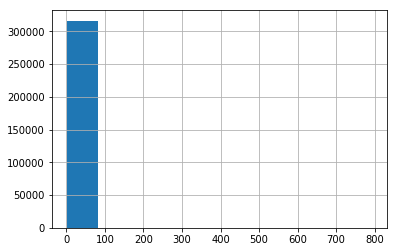

In [11]:
print(df2.ItemCount.describe())
df2.ItemCount.hist();

In [12]:
df2.loc[df.ItemCount>2].shape[0]

60160

In [15]:
df2[df2.ItemCount>130].head()

,BibNum,Title,Author,ISBN,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,FloatingItem,ItemLocation,ReportDate,ItemCount
8169,3245906,Moonlight / A24 ; Plan B ; Pastel ; produced b...,NaN,NaN,[2017],"A24 / Lionsgate,","African American men Drama, Metropolitan areas...",acdvd,nadvd,Floating,tcs,09/01/2017,140
11729,517039,Revised code of Washington.,Washington (State),NaN,1974-,"Statute Law Committee,",Law Washington State,arbk,cs6r,NaN,cen,09/01/2017,191
27221,3237829,Arrival / Paramount Pictures ; Filmnation Ente...,NaN,NaN,[2017],"Paramount Pictures,","Human alien encounters Drama, Fiction films, S...",acdvd,nadvd,Floating,tcs,09/01/2017,173
32231,550617,Minerals yearbook / prepared by the staff of t...,NaN,NaN,1933-,"The Bureau,","Mineral industries United States Periodicals, ...",arbk,caref,NaN,cen,09/01/2017,278
84761,516899,Book of ASTM standards; with related materials.,American Society for Testing and Materials,NaN,NaN,American Society for Testing and Materials.,"Materials Standards, Standardization United St...",arbk,cs7r,NaN,cen,09/01/2017,191


In [ ]:
# Except for the movie arrival, these popular items looks very weird. Likely indicates something funky with the data or counting? 

In [ ]:
## acbk  = common code for book (there are others )

In [18]:
df2.loc[df2.ItemType=="acbk"].shape[0]
df2.loc[df2.ItemType=="acbk"].head(2)

,BibNum,Title,Author,ISBN,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,FloatingItem,ItemLocation,ReportDate,ItemCount
42,3259688,The English daughter / Maggie Wadey.,"Wadey, Maggie","1910985139, 9781910985137",2016.,"Sandstone Press Ltd,","Wadey Maggie Family, Kavanagh Agnes Teresa Chi...",acbk,canf,NaN,cen,09/01/2017,2
44,2535499,Acid precipitation : hearings before the Subco...,United States. Congress. House. Committee on E...,NaN,1982.,"U.S. G.P.O.,","Acid rain United States, Acid pollution of riv...",acbk,canf,NaN,cen,09/01/2017,2


In [20]:
# New DF for "popular books"
df_books = df2.loc[(df2.ItemType=="acbk") & (df2.ItemCount>3)]
print(df_books.shape[0])
print(df_books.ItemCount.describe())

6939
count    6939.000000
mean        6.691742
std         8.862809
min         4.000000
25%         4.000000
50%         4.000000
75%         5.000000
max       177.000000
Name: ItemCount, dtype: float64


In [25]:
df_books = df_books.sort_values("ItemCount",ascending=False).drop(["ReportDate"],axis=1).drop_duplicates("Title")
print(df_books.shape[0])
df_books.head()

3167


,BibNum,Title,Author,ISBN,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,FloatingItem,ItemLocation,ItemCount
2355367,3183534,Hillbilly elegy : a memoir of a family and cul...,"Vance, J. D.","0062300547, 9780062300546",[2016],"Harper, an imprint of HarperCollinsPublishers,","Vance J D, Vance J D Family, Working class whi...",acbk,nanf,NaN,tcs,177
2218849,3272526,What happened / Hillary Rodham Clinton.,"Clinton, Hillary Rodham","1501175564, 9781501175565",2017.,"Simon & Schuster,","Clinton Hillary Rodham, Presidents United Stat...",acbk,nab,NaN,tcs,125
1099188,3196294,Strangers in their own land : anger and mourni...,"Hochschild, Arlie Russell, 1940-","1620972255, 9781620972250",2016.,"The New Press,",Conservatism United States History 21st centur...,acbk,nanf,NaN,tcs,105
934540,3238201,You don't have to say you love me : a memoir /...,"Alexie, Sherman, 1966-","031627075X, 9780316270755",2017.,"Little, Brown and Company,","Alexie Sherman 1966, Authors American 20th cen...",acbk,nanf,NaN,tcs,100
1544242,3262057,Glass houses / Louise Penny.,"Penny, Louise","1250066190, 9781250066190",2017.,"Minotaur Books,","Gamache Armand Fictitious character Fiction, P...",acbk,namys,Floating,tcs,96
